# Artificial neural networks

Author: Julian Lißner

For questions and feedback write a mail to: [lissner@mib.uni-stuttgart.de](mailto:lissner@mib.uni-stuttgart.de)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

## Dense feed forward neural network
<img src='figures/nn_arbitrary.png' width="900">


- machine learning in the perspective of the machine
    - parameters (weights/bias): randomly allocated (some numbers)
    - input: some numbers
    - output: some numbers
    - prediction: take numbers, give numbers
    - learning: loss minimization $\blacktriangleright$ error $\blacktriangleright$ gradient computation
    - architecture/hyperparameters: defined by the expert <br>

$\blacktriangleright$ numbers make up and govern the machine learning model

## Data processing
- __Note:__ __Here__ data arranged column wise - each column one sample
- __Note:__ Many high level frameworks (e.g. tensorflow, pytorch) use row wise arranged data.
- quality of data governs model performance
- input processing: importance of input features
- output processing: better initial guess, less prone to local minima
- different data sets $\blacktriangleright$ model evaluation
    - training-, validation-, test set
    
    
### Example for input importance
- two equally important features being defined in $x_1 \in [0.5,2]\,,\quad x_2\in[999,1500]\,$
- randomly allocated weights on similar scale
- evaluation $\blacktriangleright x_2$ dominates output value

In [2]:
sample_1 = np.array( [ 0.8, 1000 ] )
sample_2 = np.array( [ 0.8, 1200 ] )
sample_3 = np.array( [ 1.4, 1000 ] )
weights = np.array( [-0.5, 0.5] )

print( 'activation sample_1:', weights @ sample_1)
print( 'activation sample_2:', weights @ sample_2)
print( 'activation sample_3:', weights @ sample_3)

activation sample_1: 499.6
activation sample_2: 599.6
activation sample_3: 499.3


<img src='figures/shifted_outputs.png' width="430">


## Online offline phase
- online phase: computationally involved training
- general scheme in the offline phase
    - input scaling & output scaling
    - model prediction
    - (possibly output unscaling)
    - loss computation $\blacktriangleright$ gradient computation 
    - parameter adjustment/ learning
- online phase: fast and efficient prediction
- general scheme in the online phase
    - input scaling
    - model prediction
    - output unscaling

-------------
--------------
## ANN evaluation
### Forward propagation
<img src='figures/nn_simple.png'>

- propagate through each layer
- weights and biases $\blacktriangleright$ model parameters
- component wise activation function in each layer
- forward propagation: $$ \underline a^l = f( \underline z^l) = f\big( \underline{\underline W}^l\,\underline a^{l-1}\,  + \underline b^l \big) $$
- with $\underline a^l$: output of layer $l$, $\quad \underline z^l$: activation of layer $l$, $\quad \underline{\underline W}^l,\underline b^l$: parameters connecting to layer $l$

In [3]:
n_samples = 150
input_dimension = 12
output_dimension = 3
inputs = np.random.randn( input_dimension, n_samples)
outputs = np.random.randn(  output_dimension, n_samples)*3 +1


sigmoid = lambda x: 1/( 1+ np.exp(-x) )

n_neurons = [input_dimension, 50, 40, 80, output_dimension]
weights = []
bias = []
for i in range( 0, len( n_neurons)-1):
    weights.append( np.random.rand( n_neurons[i+1], n_neurons[i] ) )
    bias.append( np.random.rand( n_neurons[i+1] )[:,None])


n_layers = len( weights )
print( '{0:} nonlinear hidden layers + 1 linear output layer (scaling and shifting) --> {1:} weight matrices and {1:} bias vectors (all of different size, in general)'.format( n_layers-1, n_layers))
## forward propagation
a = inputs.copy()
for i in range( n_layers ):
    if i == (n_layers-1): #output layer
        a = weights[i] @ a + bias[i]
    else:
        a = sigmoid( weights[i] @ a + bias[i])

y = a[...,0].copy()
print( 'ann prediction for the first sample:', y )
print( 'target value for the first sample:',  outputs[...,0] )

3 nonlinear hidden layers + 1 linear output layer (scaling and shifting) --> 4 weight matrices and 4 bias vectors (all of different size, in general)
ann prediction for the first sample: [38.59954528 39.68041679 41.78796235]
target value for the first sample: [ 1.31106527  5.39472737 -0.41969755]


- model prediction improves through 'learning' (gradient back propagation)
- gradient based optimization methods will converge to the next best local minimum

-----------
### learning - gradient back propagation
- for readability, ommit underlines in notation
- consider a 2 hidden layer neural network, $l=[1,2,3]$
- objective function $\Phi = \frac12 ( y-a^3)^2$
- $W^1$: weights connecting to the first hidden layer<br>




- iterative learning over $i$ epochs
- adjust parameters with partial gradients of the cost function $\Phi$
- update weights and biasses (e.g. gradient descent): $ W^l \gets W^l - \eta \, \dfrac{\partial \Phi}{\partial W^l} \dots$
- no direct derivative, chain rule:
$ \dfrac{\partial x}{\partial z} = \dfrac{\partial x}{\partial y} \, \dfrac{\partial y}{\partial z} $<br>
$\qquad\blacktriangleright$ elaborate chain rule:


\begin{equation*}
 \begin{aligned}[rl]
   \dfrac{\partial  \Phi}{\partial W^3} &= \underbrace{\dfrac{\partial \Phi}{\partial a^3}}_{\delta^3} \dfrac{\partial  a^3}{\partial z^3} \dfrac{\partial  z^3}{\partial W^3} \\[2mm]
   \dfrac{\partial  \Phi}{\partial W^2} &= \underbrace{\underbrace{\dfrac{\partial \Phi}{\partial a^3}} \dfrac{\partial  a^3}{\partial z^3} \dfrac{\partial  z^3}{\partial a^2}}_{\delta^2} \dfrac{\partial a^2}{\partial z^2} \dfrac{\partial  z^2}{\partial W^2} \\[2mm]
   \dfrac{\partial  \Phi}{\partial W^1} &= \underbrace{\underbrace{\underbrace{\dfrac{\partial \Phi}{\partial a^3}} \dfrac{\partial  a^3}{\partial z^3} \dfrac{\partial  z^3}{\partial a^2}} \dfrac{\partial a^2}{\partial z^2}\dfrac{\partial  z^2}{\partial a^1}}_{\delta^1} \dfrac{\partial a^1}{\partial z^1} \dfrac{\partial  z^1}{\partial W^1} \\[2mm]
 \end{aligned}
\end{equation*}
   


- weight increment: $\dfrac{\partial \Phi_i}{ \partial W_i^{l}} = \delta^l\,  \dfrac{\partial a^l}{\partial z^l} \dfrac{\partial z^l}{\partial W^l} $
- $\delta$ term update: $\delta^{l-1} = \delta^{l} \,\dfrac{\partial a^l}{\partial z^l} \,\dfrac{\partial  z^{l}}{\partial a^{l-1}}  $

- given the equation for forwad propagation $ a^l = f( z^l) = f\big( W^l\, a^{l-1}\, + b^l \big) $each term can be computed as
\begin{equation*}
    \dfrac{\partial \Phi}{\partial a^3} = y- a^3 \hspace{1.5cm}
   \dfrac{\partial a^l}{\partial z^l} = f^{\prime}(z^l) \hspace{1.5cm}
   \dfrac{\partial z^{l}}{\partial a^{l-1}} = {W^{l}} \hspace{1.5cm}
   \dfrac{\partial z^l}{\partial W^l} =  1 \otimes a^{l-1} \hspace{1.5cm}
   \dfrac{\partial z^l}{\partial b^l} =  1 
\end{equation*}
- bias analogue
- each sample yields a single $\delta$ term $\blacktriangleright$ efficient implementation via matrix multiplications <br>
$\quad \blacktriangleright$ for implementation, the weight and bias update are given as 
    - $W^l = W^l + \frac{\eta}{n} \sum\limits_{i=1}^{n} \dfrac{\partial \Phi_i}{\partial W^l}$
    
    -$b^l = b^l + \frac{\eta}{n} \sum\limits_{i=1}^{n} \dfrac{\partial \Phi_i}{\partial b^l}$
    - for all samples $i$ in a training batch of size $n$

In [ ]:
delta.shape == n_out, n_samples
weights.shape == n_out, n_in
self.input.shape == n_in, n_samples
for i in range( n_samples):
    dw = np.outer( self.input, delta[:,i] )
dw_1 = delta  @ self.input.T 
np.allclose( dw, dw_1)

-------
---------
### Training a good neural network
- reasons for a bad model
    - overfitting
    - underfitting
    - too simple model
    - poor data 
    - too complex data<br><br>
- model can be improved with hyperparameter tuning
    - data preprocessing
    - architecture (layer structure)
    - loss function
    - learning rate
    - dynamic learning rate
    - training duration
    - regularization
    - loss regularization
    - dropout
    - batch normalization (layer normalization)<br><br>
- algorithmic improvement
    - early stopping
    - stochastic gradient descent
    - data batches
    - moment of gradient

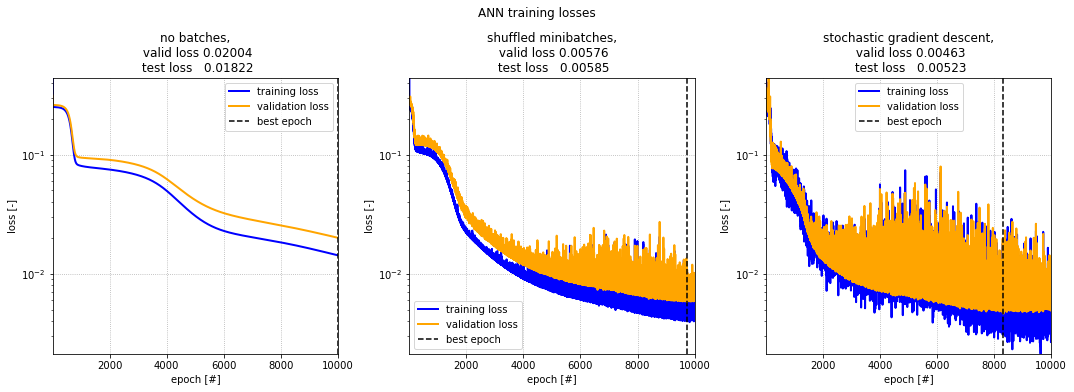

In [4]:
losses = list( np.load( 'data/ann_training_losses.npz' ).values() )
train_losses = np.array( losses[:-1:2])
valid_losses = np.array( losses[1:-1:2])
min_loss = train_losses.min()
max_loss = valid_losses.max()

fig, axes = plt.subplots( 1, 3, figsize=(15,5.5))
n_epochs = train_losses.shape[1]
for i in range( 3):
    best_epoch = np.argwhere( valid_losses[i] == valid_losses[i].min() )
    epochs = np.arange( n_epochs)+1
    axes[i].semilogy( epochs, train_losses[i], color='blue', lw=2, label='training loss')
    axes[i].semilogy( epochs, valid_losses[i], color='orange', lw=2, label='validation loss')
    axes[i].axvline( best_epoch, color='black', lw=1.5, ls='--', label='best epoch')

titles = [ 'no batches,\n valid loss {:.5f}\n test loss   {:.5f}', 
          'shuffled minibatches,\n valid loss {:.5f}\n test loss   {:.5f}', 
          'stochastic gradient descent,\n valid loss {:.5f}\n test loss   {:.5f}']
for i in range( len(titles)):
    titles[i] = titles[i].format( valid_losses[i].min() , losses[-1][i] )
for ax in axes:
    ax.set_xlabel( 'epoch [#]')
    ax.set_ylabel( 'loss [-]')
    ax.set_title( titles.pop(0) ) 
    ax.grid( ls=':', color='#AAAAAA' )
    ax.legend()
    ax.set_ylim( ymin=min_loss, ymax=max_loss)
    ax.set_xlim( xmin=1, xmax=n_epochs+1 )  
fig.suptitle( 'ANN training losses')
plt.tight_layout( pad=1)
    

- training set used to compute update increments
- validation set evaluated tracked training 
- test set only evaluated after final training is finished
- test set $\neq$ validation set